In [2]:
import random
random.seed("Conway99")

In [2]:
def cfun_gen(i,j,n,kr,kc,l):
    return binomial(kr-i,l-i)*binomial(n-kr-j+i,kc-l-j+i)

def ffun_gen(i, j, n, kr, kc, l):
    xx = 0
    for v in range(i+1):
        xx += ((-1)^(i+v))*binomial(i,v)*cfun_gen(v,j,n,kr,kc,l)
    return xx
     
# builds the incidence matrix of i-sets vs n-sets of an m-element set with the relation being intersection in a set of size t
def intermtx(i, n, m, t):  
    row_size = binomial(m,i)
    col_size = binomial(m,n)
    R = Subsets(m,i)
    S = Subsets(m,n)
    W = matrix(ZZ, row_size, col_size)
    for i in range(row_size):
        for j in range(col_size):
            X = R[i].intersection(S[j])
            if X.cardinality() == t:
                W[i,j] = 1
    return W

#Gives the elementary divisors and multiplicities.
def el(W):
    e = W.elementary_divisors()
    d = dict((i, e.count(i)) for i in e)
    return d



#returns the matrix M_s
def m_matrix(l, kr, kc, n, s):
    M = matrix(ZZ, kr+1-s, kc+1-s)
    for i in range(kr+1-s):
        for j in range(i,kc+1-s):
            M[i,j] = binomial(j,i)*ffun_gen(i+s,j+s,n,kr,kc,l)
    return M

#returns multiplicity of copies of the M_s matrix 
def m_mult(n,s):
    c = (binomial(n,s)-binomial(n,s-1))-(binomial(n,s-1)-binomial(n,s-2))
    return c


def e_val(G):
    A = None
    if isinstance(G, Graph):
        A = G.adjacency_matrix()
    else:
        A = G
    e = A.eigenvalues()
    d = dict((i, e.count(i)) for i in e)
    return d

def causes_double_cycle(G, v, u):
    H = copy(G)
    H.add_edge(v,u)
    dir_cycles = [c for c in H.to_directed().all_simple_cycles() if len(c)==4 and c[1]<c[-2]]
    for cycle1 in dir_cycles:
        for cycle2 in dir_cycles:
            if cycle1 != cycle2:
                if len(list(set(cycle1).intersection(cycle2))) >= 2:
                    return true
    return false

def causes_other_cycle(G,v,u,cycles):
    neighbors = list(set(G.neighbors(v)).intersection(G.neighbors(u)))
    return len(neighbors) == 1 and (neighbors[0] in cycles.get(v) or neighbors[0] in cycles.get(u))

def connect_adjacents(G, k, cycles, edges_added):
    n = len(G.vertices())
    for i in range(n):
        if G.degree(i) < k:
            for j in range(n):
                if G.degree(j) < k:
                    neighbors = list(set(G.neighbors(i)).intersection(G.neighbors(j)))
                    if i != j and not G.has_edge(i,j) and len(neighbors) == 1 and not causes_other_cycle(G, i, j, cycles) and edge_not_invalid(G, n, i, j):
                            G.add_edge(i,j)
                            edges_added.append((i,j))
                            cycles.get(i).add(j)
                            cycles.get(i).add(neighbors[0])
                            cycles.get(j).add(i)
                            cycles.get(j).add(neighbors[0])
                            cycles.get(neighbors[0]).add(i)
                            cycles.get(neighbors[0]).add(j)
def adjust(G, cycles):
    probs = []
    for i in range(len(G.vertices())):
        for j in range(len(G.vertices())):
            neighbors = list(set(G.neighbors(i)).intersection(G.neighbors(j)))
            if i != j and len(neighbors) > 2:
                print(neighbors)
                G.delete_vertex(i)
                G.add_vertex(i)
                G.delete_vertex(j)
                G.add_vertex(j)
                cycles.update({i:set()})
                cycles.update({j:set()})
                probs.append(i)
                probs.append(j)
                for neighbor in neighbors:
                    if i in cycles.get(neighbor):
                        cycles.get(neighbor).remove(i)
                    if j in cycles.get(neighbor):
                        cycles.get(neighbor).remove(j)
    print("Edges removed: ", probs)
                

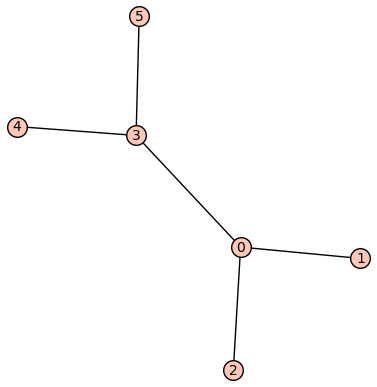

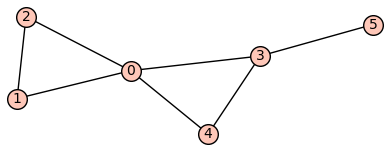

In [358]:
test = graphs.EmptyGraph()
for _ in range(6):
    test.add_vertex()
test.add_edge(0,1)
test.add_edge(0,2)
test.add_edge(0,3)
test.add_edge(3,4)
test.add_edge(3,5)
test.show()
connect_adjacents(test)
test.show()

[0 1 1 0 1 0 0 0 1]
[1 0 1 0 0 1 1 0 0]
[1 1 0 1 0 0 0 1 0]
[0 0 1 0 1 1 0 1 0]
[1 0 0 1 0 1 0 0 1]
[0 1 0 1 1 0 1 0 0]
[0 1 0 0 0 1 0 1 1]
[0 0 1 1 0 0 1 0 1]
[1 0 0 0 1 0 1 1 0]
{4: 1, 1: 4, -2: 4}


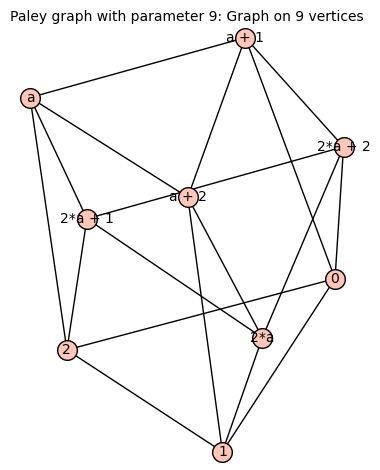

In [125]:
G = graphs.PaleyGraph(9)
H = copy(G)
print(G.adjacency_matrix())
print(e_val(G))
G

In [126]:
print(G.vertices())
e = G.edges()
print(e)

[0, a, a + 1, 2*a + 1, 2, 2*a, 2*a + 2, a + 2, 1]
[(0, a + 1, None), (0, 2, None), (0, 2*a + 2, None), (0, 1, None), (a, a + 1, None), (a, 2*a + 1, None), (2, a, None), (a, a + 2, None), (a + 1, 2*a + 2, None), (a + 1, a + 2, None), (2, 2*a + 1, None), (2*a, 2*a + 1, None), (2*a + 1, 2*a + 2, None), (1, 2, None), (2*a, 2*a + 2, None), (a + 2, 2*a, None), (1, 2*a, None), (1, a + 2, None)]


In [127]:
H.delete_vertices([0])
H.vertices()

[a, a + 1, 2*a + 1, 2, 2*a, 2*a + 2, a + 2, 1]

[0 1 0 0 1 1 0 0]
[1 0 1 0 0 0 1 0]
[0 1 0 1 1 0 1 0]
[0 0 1 0 1 0 0 1]
[1 0 1 1 0 1 0 0]
[1 0 0 0 1 0 1 1]
[0 1 1 0 0 1 0 1]
[0 0 0 1 0 1 1 0]
{1: 3, -2: 3, -0.5615528128088302?: 1, 3.561552812808830?: 1}


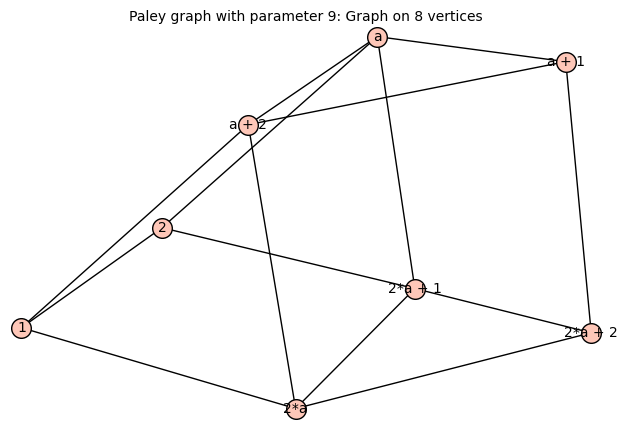

In [128]:
print(H.adjacency_matrix())
print(e_val(H))
H

In [12]:
A = graphs.strongly_regular_graph(243,22,1,2)

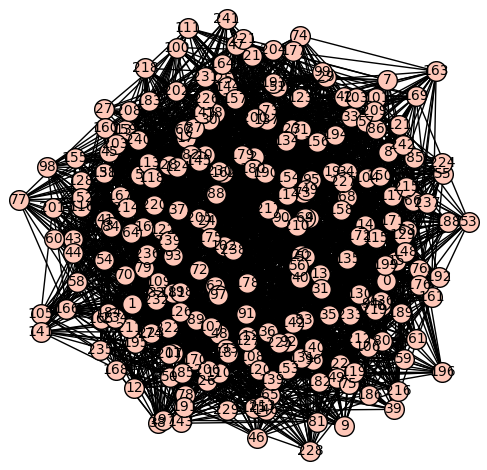

In [203]:
A.plot()

In [199]:
def triangle_construct():
    g = graphs.EmptyGraph()
    for i in range(14): # Ideal 99
        g.add_vertex()
    for i in range(1, 15):
        g.add_edge(0,i)
        if i % 2 == 1:
            g.add_edge(i,i+1)
    g.show()
    print(g.edges())
    print(len(g.vertices()))
    print(g.adjacency_matrix())

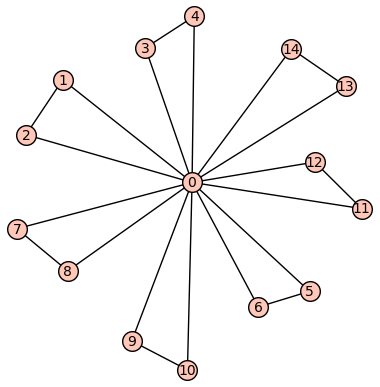

[(0, 1, None), (0, 2, None), (0, 3, None), (0, 4, None), (0, 5, None), (0, 6, None), (0, 7, None), (0, 8, None), (0, 9, None), (0, 10, None), (0, 11, None), (0, 12, None), (0, 13, None), (0, 14, None), (1, 2, None), (3, 4, None), (5, 6, None), (7, 8, None), (9, 10, None), (11, 12, None), (13, 14, None)]
15
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [200]:
triangle_construct()    

In [201]:
g.is_strongly_regular()

False

In [4]:
def build(n=9, k=4):
    step = 1
    g = graphs.EmptyGraph()
    cycles = dict()
    for i in range(n):
        cycles.update({i:set()})
    
    for _ in range(n):
        g.add_vertex()
        
    while g.average_degree() != k and step < 1000:
        for i in range(n):
            edges_added = []
            print("Step: ", step, " Node: ", i)
                
            if g.degree(i) < k:
                other_points = list(range(n))
                random.shuffle(other_points)
                for j in other_points:
                    if i != j and g.degree(j) < k and g.degree(i) < k and not g.has_edge(i,j) and not causes_other_cycle(g, i, j, cycles):
                        g.add_edge(i,j)
                        edges_added.append((i,j))
            connect_adjacents(g, k, cycles, edges_added)
            step += 1
            print("Edges Added: ", edges_added)
            

        
        if g.average_degree() != k:
            adjust(g, cycles)
            
    g.show()
    print(g.average_degree())
    for i in range(n):
        if g.degree(i) != k:
            print("Node: ", i, ", Degree:", g.degree(i))
    return g, cycles

In [52]:
def build2(n=9,k=4): # with kickstart
    g = graphs.EmptyGraph()
    for _ in range(n):
        g.add_vertex()
    g.add_edges([(0,1),(1,2),(2,0),(0,3),(0,4),(1,5),(1,6),(5,6),(3,4),(2,7),(2,8),(7,8)])
    for i in range(n):
        g.show()
        if g.degree(i) < k:
            for j in range(n):
                    if g.degree(i) < k and g.degree(j) < k and i != j and not g.has_edge(i,j):
                        if not causes_double_cycle(g, i, j):
                            g.add_edge(i,j)
    g.show()
    return g

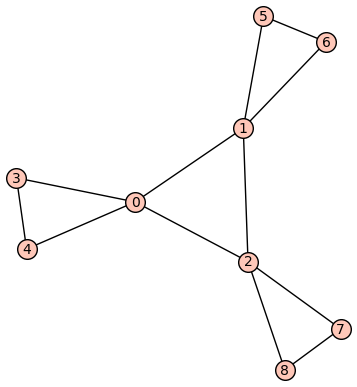

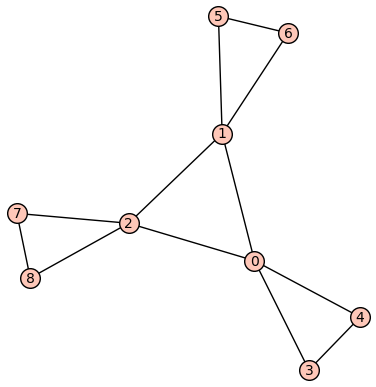

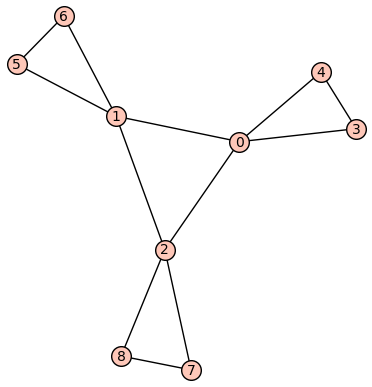

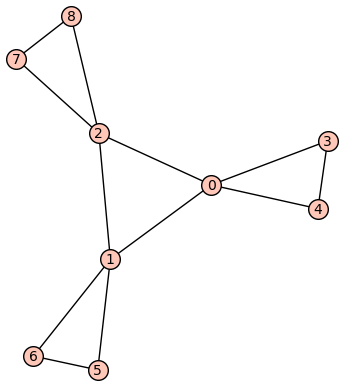

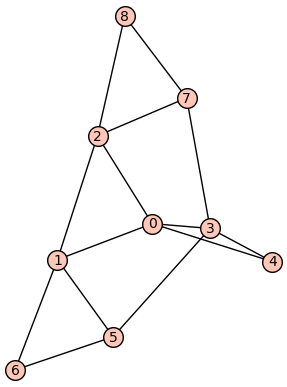

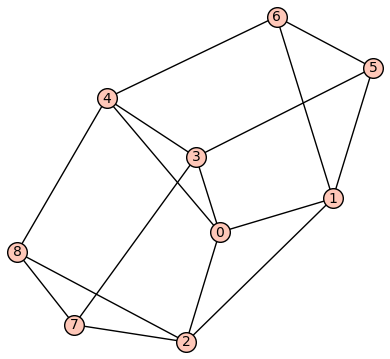

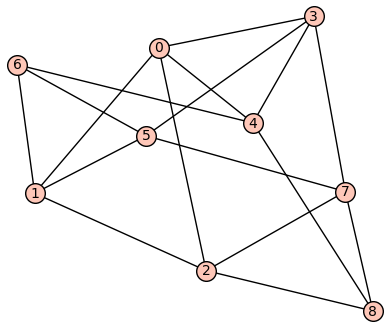

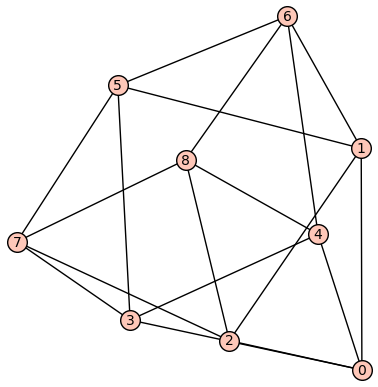

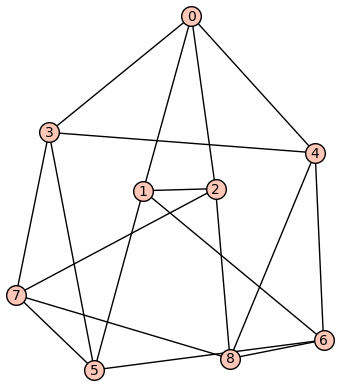

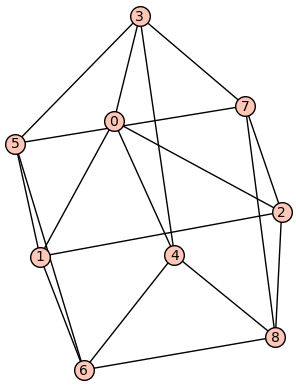

True


In [324]:
print(build2().is_strongly_regular())

In [61]:
print(G99.has_edge(67,95))

True


In [41]:
def edge_not_invalid(G, n, u, v):
    H = copy(G)
    H.add_edge(u,v)
    for i in range(n):
        for j in range(i + 1, n):
            if len(list(set(H.neighbors(i)).intersection(H.neighbors(j)))) > 2:
                return false
    return true

In [148]:
def buildv2(n, k):
    step = 1
    
    g = graphs.EmptyGraph()
    for _ in range(n):
        g.add_vertex()
    
    cycles = dict()
    for i in range(n):
        cycles.update({i:set()})
        
    while g.average_degree() != k and step < 1000:
        for i in range(n):
            print("Step: ", step, " Node: ", i)
            edges_added = []

            if g.is_strongly_regular():
                g.show()
                print(g.average_degree())
                for i in range(n):
                    if g.degree(i) != k:
                        print("Node: ", i, ", Degree:", g.degree(i))
                return g, cycles
                
            if g.degree(i) < k:
                other_points = list(range(n))
                other_points.remove(i)
                random.shuffle(other_points)
                for j in other_points:
                    if g.degree(j) < k and g.degree(i) < k and not g.has_edge(i,j) and not causes_other_cycle(g, i, j, cycles):
                        if edge_not_invalid(g, n, i, j):
                            g.add_edge(i,j)
                            edges_added.append((i,j))
            connect_adjacents(g, k, cycles, edges_added)
            
            print("Edges Added: ", edges_added)
            step += 1
            
    g.show()
    print(g.average_degree())
    for i in range(n):
        if g.degree(i) != k:
            print("Node: ", i, ", Degree:", g.degree(i))
    return g, cycles

In [9]:
J = matrix(9,9,lambda x, y: 1)

In [15]:
A = graphs.PaleyGraph(9).adjacency_matrix()
D = matrix(2 * J -2 * identity_matrix(9) - A)

In [16]:
D

[0 1 1 2 1 2 2 2 1]
[1 0 1 2 2 1 1 2 2]
[1 1 0 1 2 2 2 1 2]
[2 2 1 0 1 1 2 1 2]
[1 2 2 1 0 1 2 2 1]
[2 1 2 1 1 0 1 2 2]
[2 1 2 2 2 1 0 1 1]
[2 2 1 1 2 2 1 0 1]
[1 2 2 2 1 2 1 1 0]

In [30]:
e_val(Graph(D))

{12: 1, 0: 4, -3: 4}

In [31]:
e_val(D)

{12: 1, 0: 4, -3: 4}